In [1]:
# Import packages
import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [2]:

# Generate universe variables
# Total amount of people attribute: [0, 338]
# Total amount of children attribute: [0, 63]
# Vulnerability of a building has a range of [0, 10] 
x_people = ctrl.Antecedent(np.arange(0, 339), 'people')
x_children = ctrl.Antecedent(np.arange(0, 64),'children')
y_vulnerability  = ctrl.Consequent(np.arange(0, 11),'vulnerability')

In [9]:
# create fuzzy membership function for the input and output variables 
#fuzzy.trimf: Triangular membership function generator.
#fuzzy.trapmf: Trapezoidal membership function generator.

#Input variables IF part 
x_people['low'] = fuzz.trapmf(x_people.universe, [0, 0, 31, 100])
x_people['middle'] = fuzz.trimf(x_people.universe, [31, 120, 250])
x_people['high'] = fuzz.trapmf(x_people.universe, [100, 250,338, 338])


x_children['low'] = fuzz.trapmf(x_children.universe, [0, 0, 9, 10])
x_children['middle'] = fuzz.trimf(x_children.universe, [3, 22, 50])
x_children['high'] = fuzz.trapmf(x_children.universe, [13, 48,63, 63])


# Output variable THEN part 
y_vulnerability['VeryLow'] = fuzz.trimf(y_vulnerability.universe, [0, 2, 3])
y_vulnerability['low'] = fuzz.trimf(y_vulnerability.universe, [2, 3, 5])
y_vulnerability['middle'] = fuzz.trimf(y_vulnerability.universe, [4, 6, 7])
y_vulnerability['high'] = fuzz.trimf(y_vulnerability.universe, [6, 8, 9])
y_vulnerability['VeryHigh'] = fuzz.trimf(y_vulnerability.universe, [8, 9, 10])

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


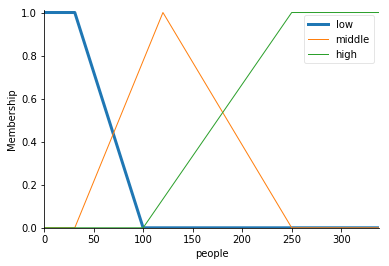

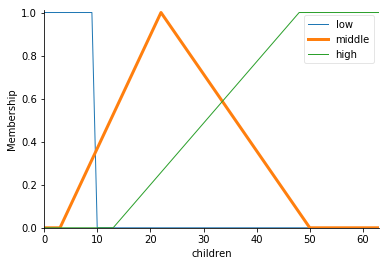

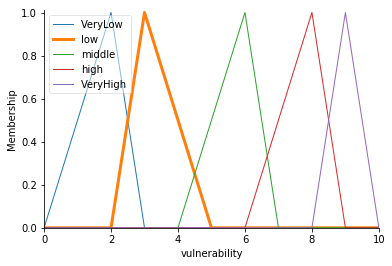

In [4]:
x_people['low'].view()
x_children['middle'].view()
y_vulnerability['low'].view()


In [10]:
# Create fuzzy rules

rule1 = ctrl.Rule(x_people['high'] | x_children['high'], y_vulnerability['VeryHigh'])
rule2 = ctrl.Rule(x_people['middle'] | x_children['high'], y_vulnerability['high'])
rule3 = ctrl.Rule(x_people['high'] | x_children['middle'], y_vulnerability['high'])

rule4 = ctrl.Rule(x_people['high'] | x_children['low'], y_vulnerability['middle'])
rule5 = ctrl.Rule(x_people['low'] | x_children['high'], y_vulnerability['middle'])
rule6 = ctrl.Rule(x_people['middle'] | x_children['middle'], y_vulnerability['middle'])

rule7 = ctrl.Rule(x_people['low'] | x_children['middle'], y_vulnerability['low'])
rule8 = ctrl.Rule(x_people['middle'] | x_children['low'], y_vulnerability['low'])
rule9 = ctrl.Rule(x_people['low'] | x_children['low'], y_vulnerability['VeryLow'])

In [11]:
# Create a controlSystem and Control system simulation 
#In order to simulate this control system, we will create a ControlSystemSimulation. 
#Think of this object representing our controller applied to a specific set of cirucmstances.
vulnerability_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
vulnerabilitySimu = ctrl.ControlSystemSimulation(vulnerability_ctrl)

In [12]:
# A building has 100 people in total and 10 of them are chidlren
vulnerabilitySimu.input['people']= 100
vulnerabilitySimu.input['children']= 10 
vulnerabilitySimu.compute()

In [13]:
print (vulnerabilitySimu.output['vulnerability'])


5.539552303284721


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


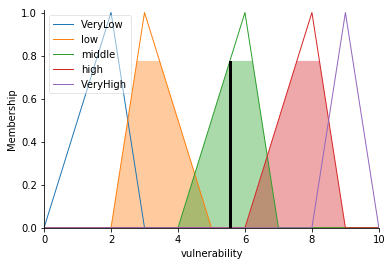

In [14]:
y_vulnerability.view(sim=vulnerabilitySimu)


jfdsfjs